#### Task 1 - Permutations and Combinations

Suppose we alter the Lady Tasting Tea experiment to involve twelve cups of tea. Six have the milk in first and the other six have tea in first. A person claims they have the special power of being able to tell whether the tea or the milk went into a cup first upon tasting it. You agree to accept their claim if they can tell which of the six cups in your experiment had the milk in first.

Calculate, using Python, the probability that they select the correct six cups. Here you should assume that they have no special powers in figuring it out, and that they are just guessing. Remember to show and justify your workings in both code and Markdown cells.

Suppose now that you are willing to accept one error. Once they select the six cups they think had the milk in first, you will give them the benefit of the doubt if they have selected at least five of the correct cups. Calculate the probability, assuming they have no special powers, that the person makes **at most one error**.

Would you accept two errors? Explain your reasoning.


#### The Lady Tasting Tea
![Lady Tasting Tea](images/ladytastingtea.PNG)

Over a century ago, an Englishwoman caused a bit of a stir when she was able to demonstrate to several prominent statisticians her ability to discern, through taste alone, whether milk or tea has been initually poured into a cup.

Whilst Ronald Fisher was working at Rothamsted Research Station in 1919, he offered a cup of tea to Dr. Muriel Bristol. She politely declined, explaining that she preferred the milk to be poured into the cup first. Young Fisher dismissed her request, insisting that the order in which milk was added couldn’t possibly affect the taste. Bristol stood by her claim, however, asserting that she could always tell the difference. William Roach, her future husband,  overheard the conversation and suggested that she be tested.

In the original experiment, the test subject is presented with eight cups of tea in a random order — four made by adding milk first and four made by adding tea first. The subject's task is to identify which four cups were prepared using one of these methods. They are allowed to compare the cups directly with one another if they wish. The procedure of the experiment is completely explained to the subject beforehand.



### Using the Combination Formula

It's important to emphasise that we're using *combinations rather than permutations* here since the order in which the cups are chosen doesn't matter. As we are selecting 4 cups with milk first from 8 cups, we care only about which cups are selected, rather than the sequence in which they are chosen. Combinations are used when the arrangement of the selected items is irrelevant, while permutations consider the order, which is not relevant in this case.

We therefore use the [combination formula](https://en.wikipedia.org/wiki/Combination) to calculate the number of ways to select a smaller set of cups from a larger set. The formula is used to calculate how many ways we can choose **k** items from a total of **n** items, and it is given by:

<br>

![Binomial formula](https://latex.codecogs.com/png.latex?%5Cbinom%7Bn%7D%7Bk%7D%20%3D%20%5Cfrac%7Bn!%7D%7Bk!(n-k)!%7D)

<br>

Where:

- **n!** (n factorial) is the product of all positive integers up to \( n \),
- **k!** is the product of all positive integers up to \( k \),
- **(n-k)!** is the product of all positive integers up to \( (n - k) \).




Before we code, we can satisfy ourselves of the numbers mathematically by plugging in the figures:

**8! (factorial of 8)** is:

8 × 7 × 6 × 5 × 4 × 3 × 2 × 1 = 40,320

**4! (factorial of 4)** is:

4 × 3 × 2 × 1 = 24

(8 − 4)! is equal 4!:

4 × 3 × 2 × 1 = 24

The number of combinations is:

40,320 / (24 × 24) = 40,320 / 576 = 70




Lets now plug in our updated figures:

**12! (factorial of 12)** is:

12 × 11 × 10 × 9 × 8 × 7 × 6 × 5 × 4 × 3 × 2 × 1 = 479,001,600

**6! (factorial of 6)** is:

6 × 5 × 4 × 3 × 2 × 1 = 720

(12 − 6)! is 6!:

6 × 5 × 4 × 3 × 2 × 1 = 720

The number of combinations is now:

479,001,600 / (720 × 720) = 479,001,600 / 518,400 = 924


In [28]:
import math
import itertools

## Adapted from https://github.com/ianmcloughlin/2425_applied_statistics/blob/main/02_lady_tasting_tea.ipynb

# Define our variables
n = 8  # Total number of cups
k = 4  # Number of cups with milk in first

# Calculate the number of combinations
combination = math.factorial(n) // (math.factorial(k) * math.factorial(n - k))

print(f"In Fisher's experiment, the number of ways to choose {k} milk-before-tea from {n} cups is: {combination}")


In Fisher's experiment, the number of ways to choose 4 milk-before-tea from 8 cups is: 70


In [29]:
# Defining variables
n = 12  # Total number of cups
k = 6  # Number of cups with milk in first

# Calculate the number of combinations
combination = math.factorial(n) // (math.factorial(k) * math.factorial(n - k))

print(f"In our version of the experiment, the number of ways to choose {k} milk-before-tea cups from {n} cups is: {combination}")


In our version of the experiment, the number of ways to choose 6 milk-before-tea cups from 12 cups is: 924


Below is a slightly abridged version of the code from lecture 4, amended to reflect that we are now dealing with six cups rather than four.

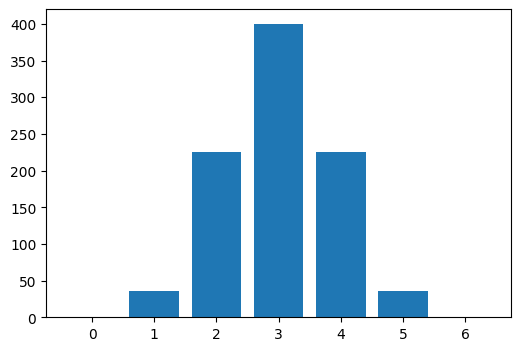

In [30]:
import itertools
import random
import numpy as np
import matplotlib.pyplot as plt

no_cups = 12
no_cups_milk_first = 6

## Exerpts from Ian's code below - Adapted from https://github.com/ianmcloughlin/2425_applied_statistics/blob/main/02_lady_tasting_tea.ipynb

# The cup labels.
labels = list(range(no_cups))
combs = list(itertools.combinations(labels, no_cups_milk_first))

# Select four cups at random to put milk in first.
# https://docs.python.org/3/library/random.html#random.sample
labels_milk = random.sample(labels, 6)

# Sort, inplace.
labels_milk.sort()

# Turn labels_milk into a set.
# Uses: https://docs.python.org/3/tutorial/datastructures.html#sets
set(labels_milk)

# Calculate the overlap between each element of combs and labels_milk.

no_overlaps = []

for comb in combs:
  # Turn comb into a set.
  s1 = set(comb)
  # Turn labels_milk into a set.
  s2 = set(labels_milk)
  # Figure out where they overlap.
  overlap = s1.intersection(s2)
  # Show the combination and the overlap.
  # Append overlap to no_overlaps.
  no_overlaps.append(len(overlap))

  # Count the number of times each overlap occurs.
counts = np.unique(no_overlaps, return_counts=True)


# Create a figure.
fig, ax = plt.subplots(figsize=(6, 4))

# Bar chart.
ax.bar(counts[0], counts[1]);

[1]: https://www.irishtimes.com/news/science/how-a-tea-tasting-test-led-to-a-breakthrough-in-statistics-1.3998786 "Irish Times Article"
[2]: https://towardsdatascience.com/lady-tasting-tea-a-bayesian-approach-1b0b94ca1530 "Towards Data Science - Bayesian Approach"
[3]: https://en.wikipedia.org/wiki/Combination "Combination - Wikipedia"

## References

1. [How a tea-tasting test led to a breakthrough in statistics - Irish Times][1]
2. [Lady Tasting Tea: A Bayesian Approach - Towards Data Science][2]
3. [The Combination Formula - Wikipedia][3]


#### Task 2: numpy's Normal Distribution




#### Task 3: t-Test Calculation

#### Task 4: ANOVA
